In [1]:
pip install eurostatapiclient

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from eurostatapiclient import EurostatAPIClient
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

In [3]:
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [4]:
ds = ['env_ac_egss1', 'env_ac_egss2', 'nama_10_gdp', 'nama_10_a10_e']

In [5]:
params = dict.fromkeys(ds, {})
params.update({'env_ac_egss1': {'ceparema': 'TOTAL',
'GEO': 'EU27_2020',
'nace_r2': 'TOTAL',
'na_item': 'EMP_DC',
'sinceTimePeriod': '2000',
'ty': 'TOT_EGSS',
'unit': 'FTE',
'precision': 1},
'env_ac_egss2': {'ceparema': 'TOTAL',
'GEO': 'EU27_2020',
'nace_r2': 'TOTAL',
'na_item': 'B1G',
'sinceTimePeriod': '2000',
'ty': 'TOT_EGSS',
'unit': 'MEUR_CLV10',
'precision': 1},
'nama_10_gdp' : {'GEO': 'EU27_2020',
'na_item': 'B1GQ',
'sinceTimePeriod': '2000',
'unit': 'CLV10_MEUR',
'precision': 1},
'nama_10_a10_e': {'GEO': 'EU27_2020',
'nace_r2': 'TOTAL',
'na_item': 'EMP_DC',
'sinceTimePeriod': '2000',
'unit': 'THS_PER',
'precision': 1}
})

In [9]:
df = dict.fromkeys(ds)
[df.update({ds: client.get_dataset(ds, params = params[ds]).to_dataframe()}) for ds in df.keys()];
lastTimePeriod = 2017
geoPlace = 'EU27_2020'
for ds in df.keys():
    data = df[ds].copy() # actually not necessary
    df[ds] = data[data.time.astype(int) <= lastTimePeriod] 
    df[ds] = data.loc[data['geo' ]== geoPlace]
baseYear = 2000
basevalues, values = dict.fromkeys(ds), dict.fromkeys(ds)
for ds in df.keys():
    data = df[ds].copy()
    basevalues[ds] = data[data.time.astype(int) == baseYear]['values'].squeeze()
    values[ds] = 100 * data['values']/basevalues[ds]

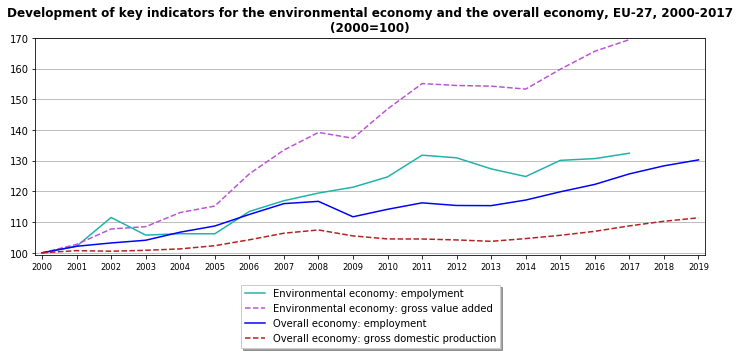

In [14]:
labels = dict.fromkeys(ds, {})
labels.update({'env_ac_egss1': "Environmental economy: empolyment",
'env_ac_egss2': "Environmental economy: gross value added",
'nama_10_gdp' : "Overall economy: employment",
'nama_10_a10_e': "Overall economy: gross domestic production"
})
kw_plot = dict.fromkeys(ds, {})
kw_plot.update({'env_ac_egss1': {'color': 'lightseagreen'},'env_ac_egss2': {'linestyle': 'dashed', 'color':'mediumorchid'},'nama_10_gdp' : {'color': 'blue'},'nama_10_a10_e': {'linestyle': 'dashed', 'color': 'firebrick'}})
fig, ax = plt.subplots()
plt.margins(x = 0.01, y = 0.01)
[ax.plot(df[ds].time, values[ds], label = labels[ds], **kw_plot[ds]) for ds in df.keys()];
ax.yaxis.grid()
plt.title('Development of key indicators for the environmental economy and the overall economy, EU-27, 2000-2017\n(2000=100)', fontweight = 'bold')
plt.legend(loc = 'lower center', fancybox = False, shadow = True,bbox_to_anchor = (0.5, -0.45))
ax.xaxis.set_tick_params(labelsize = 'small')
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1], forward=True)